In [1]:
import gym
import time
from gym import wrappers
from DQN_Agent import DQN_Agent
from DQN_Guided_Exploration import DQN_Guided_Exploration
from Helpers import plot_rewards_and_length,plot_state_scatter
import numpy as np
import csv

/Users/ericsmith/anaconda/envs/MachineLearning/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
max_episodes = 5
record_video_every = 100

(3,)
MountainCar-v0_DQN_dirichlet


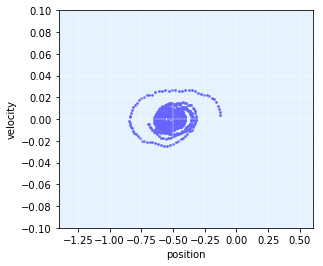

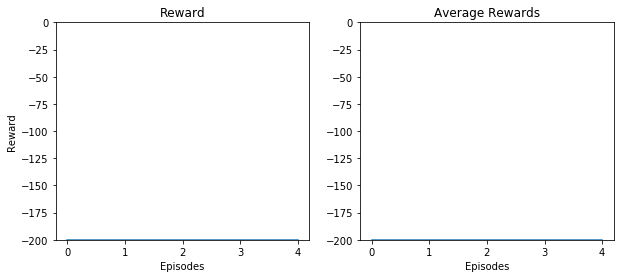

Dynamics model has converged!
['loss'] 0.0009915423579514027


TypeError: pdf() takes 3 positional arguments but 4 were given

In [6]:
for game in ["MountainCar-v0"]:#, "LunarLander-v2", 
#     for distribution in ["multivariate_normal", "matrix_normal", "dirichlet", "wishart", "invwishart"]:
    for distribution in ["dirichlet"]:#, "multivariate_normal", "matrix_normal"
        env = gym.make(game)
        env.seed(0)

        for agent in [DQN_Agent(env=env), DQN_Guided_Exploration(env=env, distribution=distribution)]: # baseline vs testing
            env.reset()
            # env = wrappers.Monitor(env, 'replay', video_callable=lambda e: e%record_video_every == 0,force=True)

            state_shape = (1,env.observation_space.shape[0])  # reset state

            start_time = time.time()
            total_reward_list = []
            episode_length_list = []

            for episode in range(max_episodes):
                agent.on_episode_start()
                cur_state = env.reset().reshape(state_shape)
                steps = 0
                total_reward = 0
                done = False
                while not done:
                    steps += 1
                    action = agent.act(cur_state)
                    new_state, reward, done, _ = env.step(action)
                    new_state = new_state.reshape(state_shape)
                    agent.update_model(cur_state, action, reward, new_state, done)
                    cur_state = new_state
                    total_reward += reward
                    if done:
                        break

                agent.on_episode_end()
                total_reward_list.append(total_reward)
                episode_length_list.append(steps)
                # print('episode {} steps: {}, total reward: {},  elapsed time: {}s'.format(episode, steps, total_reward, int(time.time()-start_time)))
            print(game+"_"+agent.name+"_"+distribution)
            plot_state_scatter(agent,title1=game+"_"+agent.name+"_"+distribution,title2='',xlabel1='position',ylabel1='velocity',xlabel2='x-velocity',ylabel2='y-velocity',color= '#6666ff')
            plot_rewards_and_length(game+"_"+agent.name+"_"+distribution, total_reward_list, -200.,0., episode_length_list)